In [15]:
import pysam
import pandas as pd
from numpy.random import choice
import random
import time
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt

In [18]:
def shortest_distance(site,filename):
    start_time = time.time()
    track_output = [record for record in pysam.Tabixfile(filename).fetch(site[0])]
    all_distances = []
    for instance in track_output: 
        chrom,start,end,origin_name = instance.split("\t")
        if int(start)<site[1]<int(end): 
            all_distances.append(0)
        else: 
            all_distances.extend([abs(int(start)-site[1]),abs(int(end)-site[1])])
    return([min(all_distances),time.time()-start_time])
#     return(min(all_distances))

In [13]:
! zcat ../../../data/global/track_data/replication/main_origins.bed.gz | head 

chr1	905964	907493	HO_192
chr1	1051816	1052506	HO_307
chr1	1158816	1161801	HO_380
chr1	1186604	1187584	HO_402
chr1	1465227	1468110	HO_573
chr1	1475400	1477938	HO_577
chr1	1754647	1755441	HO_693
chr1	1973654	1974546	HO_802
chr1	2324272	2325442	HO_985
chr1	2494359	2494956	HO_1099

gzip: stdout: Broken pipe


# testing

In [16]:
sites=[]
#get chrom length information so I can perform weighted choice for non-mut site selection"
ChromLengths = pd.read_csv(tmp_file_dir+'data/global/sequence/hg38_chromosomelengths.csv') #read in the csv file of hg38 chrom lengths I found on the internets 
total_length=0 #lets sum (get the total length) 
for length in list(ChromLengths.Length): 
    total_length+=int(length.replace(",",""))

#build dictionary to store porbability 
dict_lengths = {}#creat emepty dictionary 
for x in range (0,22): 
        tmp_index = x +1
        length = str(ChromLengths[x:x+1]).split()[4]
        length = length.replace(",", "")
        length = int(length)
        dict_lengths["chr"+str(tmp_index)] = length

#make the porbability of choosing a chrom based on length 
list_chroms = ['chr' + str(i) for i in range(1, 23)]
list_chrom_probabilities = []
for chrom in list_chroms: 
    list_chrom_probabilities.append(dict_lengths[chrom]/total_length)
list_chrom_probabilities[0] = list_chrom_probabilities[0]+1-sum(list_chrom_probabilities) # adds the 0.00000001 left from rounding errors to the chr1 so sum adds perfectly to 1. 
assert(sum(list_chrom_probabilities)==1)

#perfrom the non-mutant site draw 
number_nonmuts = 10000
chrom_draw = choice(list_chroms, number_nonmuts,p=list_chrom_probabilities)

# print(tissue,"make the sites list with the chr# and site" )
for i in (range(1,23)): 
    chrom = "chr"+str(i)
    chrom_nchoose = list(chrom_draw).count("chr"+str(i))
    chrom_sites_chosen = random.sample(range(1, dict_lengths[chrom]), chrom_nchoose) #without duplucates 
    for j in chrom_sites_chosen: 
        sites.append([chrom,j,0])# the 0 if for the mutation status column. 0 = no 

In [19]:
tmp_file_dir = "../../../"
filename = tmp_file_dir+"data/global/track_data/replication/main_origins.bed.gz"
distances = []
first_times = []
second_times = []
for site in tqdm(sites[:1000]):
    distances.append(shortest_distance(site,filename)[0])
    first_times.append(shortest_distance(site,filename)[1])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.85it/s]


In [21]:
tmp_file_dir = "../../../"
filename = tmp_file_dir+"data/global/track_data/replication/all_origins.bed.gz"
first_all_distances = []
first_all_times = []
second_all_times = []
for site in tqdm(sites[:1000]):
    first_all_distances.append(shortest_distance(site,filename)[0])
    first_all_times.append(shortest_distance(site,filename)[1])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:24<00:00,  6.91it/s]


(array([ 67.,  56.,  15., 183., 451., 218.,   7.,   2.,   0.,   1.]),
 array([0.06391287, 0.0655441 , 0.06717534, 0.06880658, 0.07043781,
        0.07206905, 0.07370028, 0.07533152, 0.07696276, 0.07859399,
        0.08022523]),
 <BarContainer object of 10 artists>)

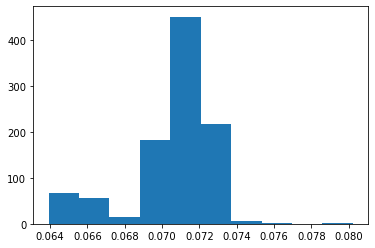

In [25]:
plt.hist(first_all_times)

In [23]:
np.mean(first_times)

0.00342464017868042